<a href="https://colab.research.google.com/github/shemaaali/DS/blob/master/AirBnB_Optimizing_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
# import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
# load and read the dataset
url = "https://raw.githubusercontent.com/bw-airbnb-2/DS/master/airbnb.csv"

air_bnb = pd.read_csv(url)
print(air_bnb.shape)
air_bnb.head()

(84438, 14)


,Unnamed: 0,Zipcode,Square Feet,Bedrooms,Bathrooms,Review Scores Rating,Accommodates,Cleaning Fee,Free Parking,Wireless Internet,Cable TV,Prop_encoded,cancel_encoded,Price
0,0,78704.0,500.000000,1.0,1.0,97.000000,2.0,25.0,1.0,1.0,1.0,1.0,2.0,85.0
1,1,78704.0,977.818033,2.0,1.0,94.505901,4.0,0.0,1.0,1.0,0.0,1.0,0.0,790.0
2,2,78704.0,977.818033,1.0,1.0,100.000000,2.0,75.0,1.0,1.0,0.0,1.0,2.0,75.0
3,3,78704.0,977.818033,1.0,1.0,94.505901,2.0,0.0,1.0,1.0,0.0,1.0,2.0,195.0
4,4,78704.0,977.818033,1.0,1.0,94.505901,2.0,0.0,1.0,1.0,1.0,1.0,0.0,200.0


In [128]:
df = pd.read_csv('listings.csv')
print(df.shape)
df.head()

(7314, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3686,Vita's Hideaway,4645,Vita,NaN,Historic Anacostia,38.86314,-76.98836,Private room,55,2,72,2020-04-01,0.60,2,345
1,3943,Historic Rowhouse Near Monuments,5059,Vasa,NaN,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91066,-77.00438,Private room,80,27,429,2018-08-07,3.12,2,112
2,4197,Bedroom in DC 2 blocks to Metro,5061,Sandra,NaN,"Capitol Hill, Lincoln Park",38.88791,-76.99668,Private room,76,28,45,2020-03-14,0.33,2,302
3,4967,"DC, Near Metro",7086,Seveer,NaN,"Ivy City, Arboretum, Trinidad, Carver Langston",38.91263,-76.99221,Private room,99,2,31,2016-09-22,0.26,3,60
4,5589,Cozy apt in Adams Morgan,6527,Ami,NaN,"Kalorama Heights, Adams Morgan, Lanier Heights",38.91933,-77.04124,Entire home/apt,73,9,95,2020-03-05,0.71,2,130


In [ ]:
df.rename(columns = {'availability_365':'availability'}, inplace = True) 

In [126]:
# convert the dataframe columns from float to integer
air_bnb = air_bnb.astype(int)
print(air_bnb.shape)
air_bnb.head()

(84438, 14)


,Unnamed: 0,Zipcode,Square Feet,Bedrooms,Bathrooms,Review Scores Rating,Accommodates,Cleaning Fee,Free Parking,Wireless Internet,Cable TV,Prop_encoded,cancel_encoded,Price
0,0,78704,500,1,1,97,2,25,1,1,1,1,2,85
1,1,78704,977,2,1,94,4,0,1,1,0,1,0,790
2,2,78704,977,1,1,100,2,75,1,1,0,1,2,75
3,3,78704,977,1,1,94,2,0,1,1,0,1,2,195
4,4,78704,977,1,1,94,2,0,1,1,1,1,0,200


In [ ]:
#get some information about the airbnb optimizing price
air_bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84438 entries, 0 to 84437
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Unnamed: 0            84438 non-null  int64
 1   Zipcode               84438 non-null  int64
 2   Square Feet           84438 non-null  int64
 3   Bedrooms              84438 non-null  int64
 4   Bathrooms             84438 non-null  int64
 5   Review Scores Rating  84438 non-null  int64
 6   Accommodates          84438 non-null  int64
 7   Cleaning Fee          84438 non-null  int64
 8   Free Parking          84438 non-null  int64
 9   Wireless Internet     84438 non-null  int64
 10  Cable TV              84438 non-null  int64
 11  Prop_encoded          84438 non-null  int64
 12  cancel_encoded        84438 non-null  int64
 13  Price                 84438 non-null  int64
dtypes: int64(14)
memory usage: 9.0 MB


In [ ]:
# check for missing values
air_bnb.isnull().sum()

Unnamed: 0              0
Zipcode                 0
Square Feet             0
Bedrooms                0
Bathrooms               0
Review Scores Rating    0
Accommodates            0
Cleaning Fee            0
Free Parking            0
Wireless Internet       0
Cable TV                0
Prop_encoded            0
cancel_encoded          0
Price                   0
dtype: int64

In [ ]:
#some description about airbnb
air_bnb.describe()

,Unnamed: 0,Zipcode,Square Feet,Bedrooms,Bathrooms,Review Scores Rating,Accommodates,Cleaning Fee,Free Parking,Wireless Internet,Cable TV,Prop_encoded,cancel_encoded,Price
count,84438.000000,8.443800e+04,84438.000000,84438.000000,84438.000000,84438.000000,84438.000000,84438.000000,84438.000000,84438.000000,84438.000000,84438.0,84438.000000,84438.000000
mean,71447.778334,3.192134e+05,976.586868,1.359270,1.243244,94.318044,3.457886,50.604894,0.354213,0.966378,0.370402,1.0,0.848788,159.388593
std,33505.716030,3.415209e+07,146.419321,0.908769,0.587128,6.601527,2.296362,57.076593,0.478277,0.180256,0.482915,0.0,0.988507,140.452580
min,0.000000,2.108000e+03,0.000000,0.000000,0.000000,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,46615.750000,2.000900e+04,977.000000,1.000000,1.000000,94.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.0,0.000000,75.000000
50%,76742.500000,9.001500e+04,977.000000,1.000000,1.000000,94.000000,3.000000,35.000000,0.000000,1.000000,0.000000,1.0,0.000000,115.000000
75%,98758.750000,9.210400e+04,977.000000,2.000000,1.000000,99.000000,4.000000,75.000000,1.000000,1.000000,1.000000,1.0,2.000000,193.000000
max,120791.000000,9.415894e+09,32292.000000,10.000000,8.000000,100.000000,18.000000,850.000000,1.000000,1.000000,1.000000,1.0,2.000000,999.000000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


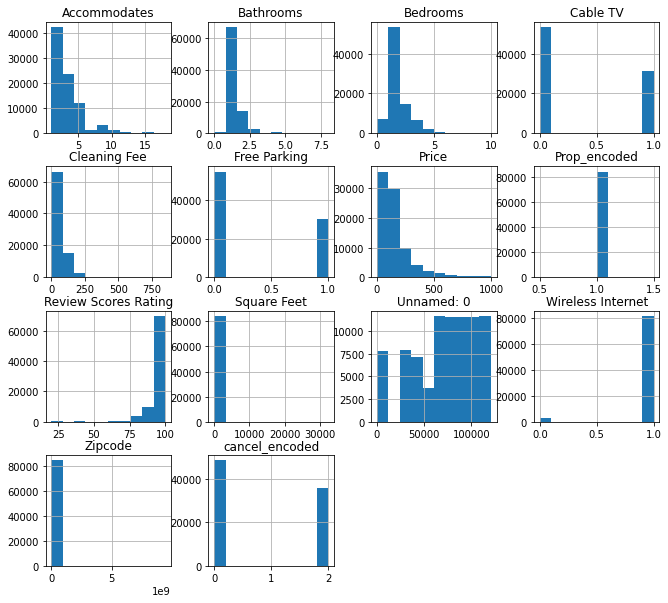

In [ ]:
# Exploratory Data Analysis for the entire airbnb data
fig = plt.figure(figsize = (11,10))
ax = fig.gca()
air_bnb.hist(ax=ax)
plt.show()

In [ ]:
rev_sc = air_bnb.groupby(by='Accommodates').agg({'Zipcode':'count', 'Review Scores Rating':'mean'}).sort_values(by='Review Scores Rating', ascending=False).reset_index()
rev_sc

,Accommodates,Zipcode,Review Scores Rating
0,18,1,100.000000
1,15,62,95.419355
2,14,148,94.770270
3,12,463,94.626350
4,2,34069,94.506179
5,4,15356,94.478640
6,6,7319,94.470419
7,13,57,94.368421
8,8,2836,94.293018
9,9,377,94.281167


In [ ]:
rev_sc_p = air_bnb.groupby(by='Accommodates').agg({'Zipcode':'count', 'Review Scores Rating':'mean', 'Price':'mean'}).sort_values(by='Review Scores Rating', ascending=False).reset_index()
rev_sc_p

,Accommodates,Zipcode,Review Scores Rating,Price
0,18,1,100.000000,575.000000
1,15,62,95.419355,468.677419
2,14,148,94.770270,415.952703
3,12,463,94.626350,456.330454
4,2,34069,94.506179,106.361326
5,4,15356,94.478640,177.338825
6,6,7319,94.470419,262.422189
7,13,57,94.368421,445.684211
8,8,2836,94.293018,338.916079
9,9,377,94.281167,344.061008


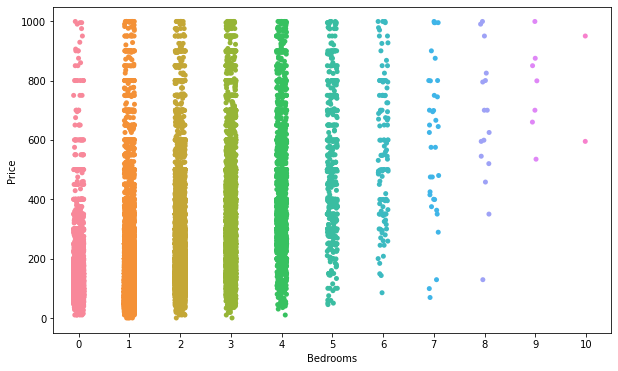

In [ ]:
fig, ax=plt.subplots(figsize=(10,6))
sns.stripplot(data=air_bnb,x='Bedrooms',y='Price',jitter=True)

plt.show()

In [ ]:
# make a correction matrix to check to see
# if there is any relationship between Accommodates and Price
corr_matrix = rev_sc_p.corr()
corr_matrix

,Accommodates,Zipcode,Review Scores Rating,Price
Accommodates,1.000000,-0.663473,0.488090,0.979664
Zipcode,-0.663473,1.000000,-0.118532,-0.703475
Review Scores Rating,0.488090,-0.118532,1.000000,0.470231
Price,0.979664,-0.703475,0.470231,1.000000


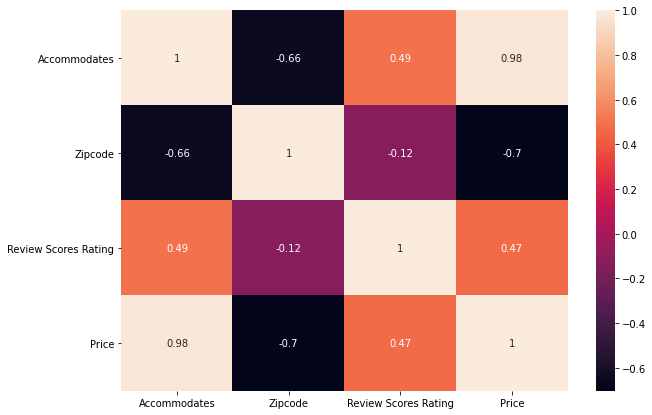

In [ ]:
# make a heat map for airbnb
fig, ax=plt.subplots(figsize=(10,7))
sns.heatmap(corr_matrix, annot = True);

In [ ]:
# make a scatter for the the location
import plotly.express as px
px.scatter(df, x='latitude', y='longitude', color='price', opacity=0.1)

In [ ]:
# We can improve the location much better by making a scatter mapbox
# https://plot.ly/python/mapbox-layers/#base-maps-in-layoutmapboxstyle
fig = px.scatter_mapbox(df, lat='latitude', lon='longitude', color='price', opacity=0.1)
fig.update_layout(mapbox_style='stamen-terrain')
fig.show()

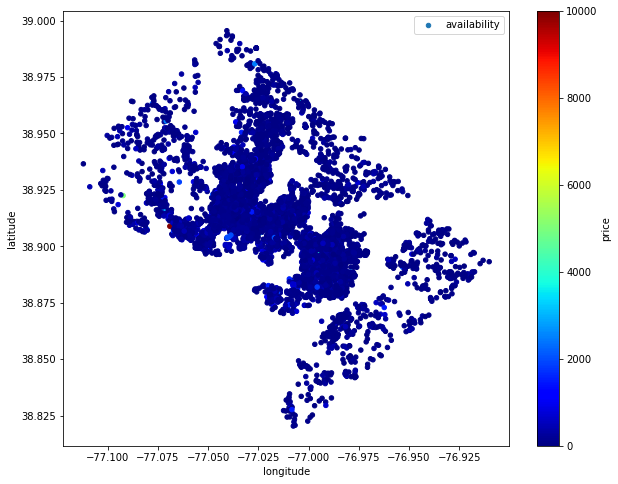

In [ ]:
#initializing the figure size
plt.figure(figsize=(10,8))
ax=plt.gca()
#using scatterplot for longitude and latitude
df.plot(kind='scatter', x='longitude', y='latitude', label='availability', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, zorder=5)

plt.legend()
plt.show()

In [124]:
#initializing the figure size
plt.figure(figsize=(35,30))
columns =['longitude','latitude','availability']
corr = df[columns].corr()
corr.style.background_gradient(cmap='coolwarm')

,longitude,latitude,availability
longitude,1.000000,-0.435684,0.001653
latitude,-0.435684,1.000000,-0.035970
availability,0.001653,-0.035970,1.000000


<Figure size 2520x2160 with 0 Axes>